In [1]:
from RegresionMultiple import LinearModel, read_data, anova_between_lm
import pandas as pd
import numpy as np

In [2]:
data = '''n   Girth Height Volume
1    8.3     70   10.3
2    8.6     65   10.3
3    8.8     63   10.2
4   10.5     72   16.4
5   10.7     81   18.8
6   10.8     83   19.7
7   11.0     66   15.6
8   11.0     75   18.2
9   11.1     80   22.6
10  11.2     75   19.9
11  11.3     79   24.2
12  11.4     76   21.0
13  11.4     76   21.4
14  11.7     69   21.3
15  12.0     75   19.1
16  12.9     74   22.2
17  12.9     85   33.8
18  13.3     86   27.4
19  13.7     71   25.7
20  13.8     64   24.9
21  14.0     78   34.5
22  14.2     80   31.7
23  14.5     74   36.3
24  16.0     72   38.3
25  16.3     77   42.6
26  17.3     81   55.4
27  17.5     82   55.7
28  17.9     80   58.3
29  18.0     80   51.5
30  18.0     80   51.0
31  20.6     87   77.0'''

lines = data.split('\n')
lines = [line.split()[1:] for line in lines]
df = pd.DataFrame(lines[1:], columns=lines[0])
df

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


In [3]:
mv = LinearModel('Volume', [], df)

['Regresión', 'Residuales', 'Total']


/home/dui/Escritorio/TIC'S/5nto/multivar_statistics/mylibrary/RegresionMultiple.py:125: RuntimeWarning: divide by zero encountered in scalar divide
  self.CM = {k:self.SC[k]/self.GL[k] for k in ('R','E','T')}


In [4]:
mv.x_names

[]

Resultados del modelo 1:
------------------------
Parametros estimados:
   Intercept
0  30.170968 

Tabla ANOVA:
  Fuente de variación  Suma de cuadrados  Grados de libertad  \
0           Regresión      -3.637979e-12                   0   
1          Residuales       8.106084e+03                  30   
2               Total       8.106084e+03                  30   

   Cuadrados medios   F_0 p_value  
0              -inf  -inf     NaN  
1        270.202796  <NA>    <NA>  
2        270.202796  <NA>    <NA>   

¿El modelo es significativo?
    F0  p_value  f_critical  is_significant
0 -inf      NaN         NaN           False 

Resultado de la prueba F:
    F0  p_value  f_critical  is_significant
0 -inf      NaN         NaN           False 

Resultado de la prueba t para cada parámetro:
                Beta    t_value  t_critical       p_value  is_significant
Intercept  30.170968  10.219395    2.042272  2.753331e-11            True 

R^2_values:
             R2   R2_adjusted
0 -4.487961

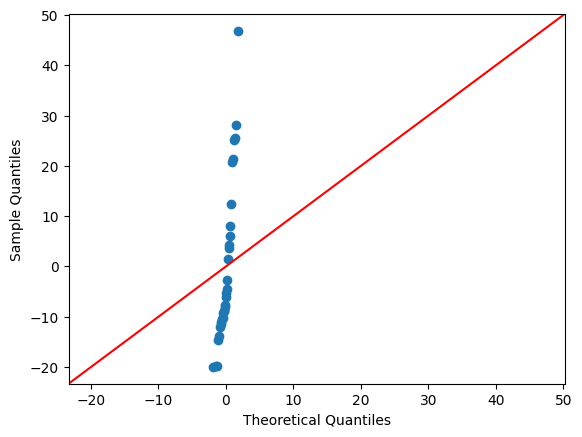

          W   p_value  is_normal
0  0.887573  0.003579      False 

Residuales contra valores ajustados:
No hay variables predictoras en el modelo. 

Residuales contra cada variable predictora:
No hay variables predictoras en el modelo. 

Intervalos de 95% para los coeficientes de regresión:
                left      betas      right     length
Intercept  24.358484  30.170968  35.983452  11.624968


In [5]:
mv.complete_summary()